`scikit-image` is a Python library for image processing that I had used only once before. It seems to have all the functionalities to easily create the CT reconstruction program without the need to program the radon transformations and backprojection algorithms from scratch. It would be interesting to try to reproduce these algorithms as a personal project later on.

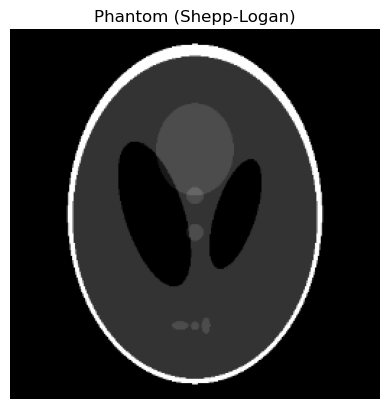

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import resize

phantom = shepp_logan_phantom()
phantom = resize(phantom, (256, 256), mode='reflect', anti_aliasing=True)

plt.imshow(phantom, cmap='gray')
plt.title("Phantom (Shepp-Logan)")
plt.axis('off')
plt.show()

The `radon()` function of the `scikit-image` library returns the radon transform of the image, i.e. the sinogram. The `circle=True` argument assumes the value is zero outside the inscribed circle, making the width of each projection (first dimension of the sinogram) equal to `min(image.shape)`.

Remember, the radon transform is the collection of all the line integrals along all possible lines at every angle of projection, as described in section 6.3.3 of Prince & Links. Medical Imaging: Signals and Systems.

The skimage documentation provides the source of this algorithm (https://www.clear.rice.edu/elec431/projects96/DSP/bpanalysis.html). Without looking at the code, I assume the implementation is a sampling and addition of the values of each pixel that lie along a line traversing the image. This could be used later as basis to generate the radon transform for a fan-beam projection.

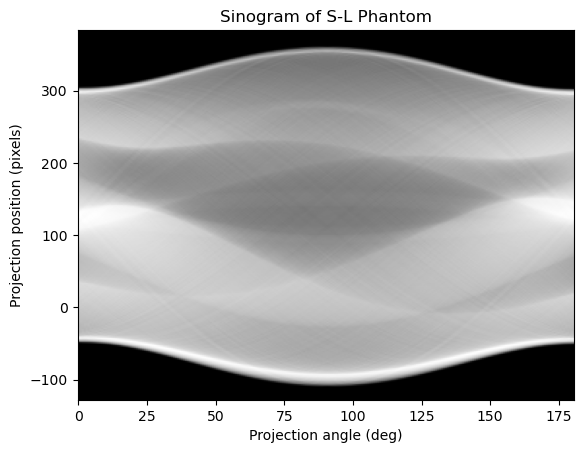

In [16]:
# Simulating the sinogram using radon transform

from skimage.transform import radon

max_angle=180.0
theta =  np.linspace(0., max_angle, max(phantom.shape), endpoint=False) # (start, stop, n_samples, don't include endpoint)
sinogram = radon(phantom, theta=theta, circle=True)
dx, dy = 0.5*max_angle/max(phantom.shape), 0.5*sinogram.shape[0]

plt.imshow(sinogram, cmap=plt.cm.Greys_r, extent=(-dx, max_angle+dx, -dy, sinogram.shape[0]+dy) ,aspect='auto')
plt.title("Sinogram of S-L Phantom")
plt.xlabel("Projection angle (deg)")
plt.ylabel("Projection position (pixels)")
plt.show()

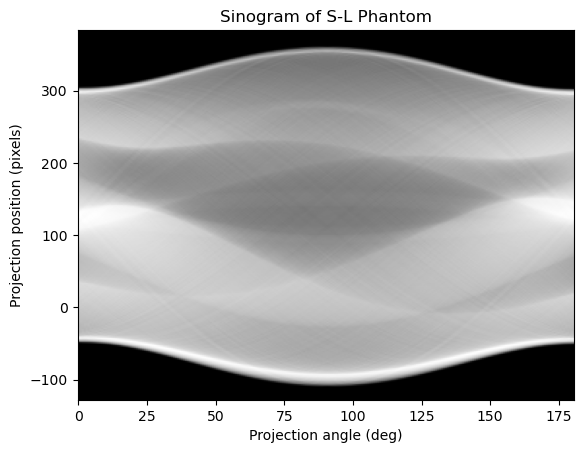

In [15]:
from skimage.transform import radon

max_angle=180.0
theta =  np.linspace(0., max_angle, max(phantom.shape), endpoint=False) # (start, stop, n_samples, don't include endpoint)
sinogram = radon(phantom, theta=theta, circle=True)
dx, dy = 0.5*max_angle/max(phantom.shape), 0.5*sinogram.shape[0]

plt.imshow(sinogram, cmap=plt.cm.Greys_r, extent=(-dx, max_angle+dx, -dy, sinogram.shape[0]+dy) ,aspect='auto')
plt.title("Sinogram of S-L Phantom")
plt.xlabel("Projection angle (deg)")
plt.ylabel("Projection position (pixels)")
plt.show()